# Stock Price Prediction

There is never a right way to predict the direcction of the Stock Market.

Our goal is to use already existing Machine Learning algorithms and techniques to achieve a *Stock Market Prediction*.

<br/>

### Getting started:

For this project, I will use the follwing Machine Learning model:
- Support Vector Machine

For our data, I will use:
- Yahoo Finance API

#### Libraries

In [46]:
# DATA PREPROCESSING/MANIPULATION
import pandas as pd
import numpy as np

# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# STOCK DATA FROM YAHOO FINANCE
import yfinance as yf

# SUPPORT VECTOR MACHINE MODEL
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split



print('[Success]')

[Success]


### Download the data from the Yahoo Finance API

Now that we have our libraries imported, we can download the data we need. 

For this specific project, I will be using **AMAZON**'s stock data.



#### How to download data?
The beauty of our imported library **Yahoo Finance API** is that there is a build in method called *download()* that will allow us to get our data.


Example usage:

    yf.download('TICKER NAME',  (In our case AMZN)

            start = 'DATE',     
                                (Data can be downloaded as far back as 1950)
            end = 'DATE', 
            
            progress = T/F)

In [8]:
# DOWNLOAD OUR DATA FOR AMAZON
df_amazon = yf.download('AMZN', # THIS CAN BE CHANGED
                        start = '1997-05-16', # THIS CAN BE CHANGED
                        end = '2021-05-16', # THIS CAN BE CHANGED
                       progress = False)

print('[Sucess]')

[Sucess]


#### Before we being any analysis, lets look at our data and see what we are working with

In [10]:
# Use desscribe() method to look at our data
df_amazon.describe

<bound method NDFrame.describe of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
1997-05-16     1.968750     1.979167     1.708333     1.729167     1.729167   
1997-05-19     1.760417     1.770833     1.625000     1.708333     1.708333   
1997-05-20     1.729167     1.750000     1.635417     1.635417     1.635417   
1997-05-21     1.635417     1.645833     1.375000     1.427083     1.427083   
1997-05-22     1.437500     1.447917     1.312500     1.395833     1.395833   
...                 ...          ...          ...          ...          ...   
2021-05-10  3282.320068  3283.000000  3190.000000  3190.489990  3190.489990   
2021-05-11  3136.280029  3238.000000  3127.370117  3223.909912  3223.909912   
2021-05-12  3185.000000  3207.939941  3133.100098  3151.939941  3151.939941   
2021-05-13  3185.469971  3203.840088  3133.000000  3161.469971  3161.469971   
2021-05-14  3185.5

In [11]:
# USE info() METHOD TO SEE OUR COLUMN DATA TYPES
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6039 entries, 1997-05-16 to 2021-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6039 non-null   float64
 1   High       6039 non-null   float64
 2   Low        6039 non-null   float64
 3   Close      6039 non-null   float64
 4   Adj Close  6039 non-null   float64
 5   Volume     6039 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 330.3 KB


In [12]:
# USE .head() TO VIEW FIRST 5 ROWS OF THE AMAZON DATAFRAME
df_amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800


## Whats next?


Since we are doing a predictive analysis, there will be a couple things we need to do.
- Adjust our data frame to only include the *Adj Close* values


- Create a variable to store the number of days out to predict
    - This value can change
    
    
- Create a new column that will hold the Stock Prediction
    - This will be our *TARGET Variable*

In [14]:
# ADJUST OUR DATA FRAME
stockPrediction_df = df_amazon[['Adj Close']]
stockPrediction_df.head()

,Adj Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
1997-05-22,1.395833


In [15]:
# CREATE VARIABLE FOR NUM OF DAYS OUT TO PREDICT
num_days = 15

In [29]:
# CREATE NEW COLUMN TO HOLD OUR STOCK PREDICTION
stockPrediction_df['Stock Prediction'] = stockPrediction_df.loc[:,'Adj Close'].shift(-num_days)
stockPrediction_df.head()

<ipython-input-29-01276f2eacec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockPrediction_df['Stock Prediction'] = stockPrediction_df.loc[:,'Adj Close'].shift(-num_days)


,Adj Close,Stock Prediction
Date,,
1997-05-16,1.729167,1.687500
1997-05-19,1.708333,1.583333
1997-05-20,1.635417,1.541667
1997-05-21,1.427083,1.604167
1997-05-22,1.395833,1.583333


<AxesSubplot:xlabel='Date'>

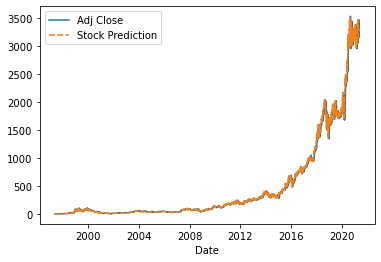

In [30]:
# LETS PLOT OUR NEW DATAFRAME TO VISUALIZE THE DIFFERENCE
sns.lineplot(data = stockPrediction_df)

# Preparing our data for modeling

Now that we have our target variable, we can start preparing our data.


For this section, we will do a few things:
- Create an independent dataset to train our models
    - This will be done using numpy array
    

- Create a dependent dataset (TARGET DATA)
    - This will be done using numpy array
    
    
- We then will set up our Train and Test split


- Create our models

#### INDEPENDENT DATASET
1. Convert dataframe to numpy array using only the *Adj Close* column
2. Remove last *n* rows (number of days out)
3. Make sure there are no NaN values

In [100]:
np.set_printoptions(suppress=False)

In [101]:
X_data = np.array(stockPrediction_df.drop(['Stock Prediction'], 1))

X_data = X_data[:-num_days]
print(X_data)
print(np.isnan(X_data).any())

[[1.72916698e+00]
 [1.70833302e+00]
 [1.63541698e+00]
 ...
 [3.36202002e+03]
 [3.30904004e+03]
 [3.34087988e+03]]
False


#### DEPENDENT DATASET
1. Convert dataframe to numpy array using only the *Stock Prediction* column
2. Remove last *n* rows (number of days out)
3. Make sure there are no NaN values

In [102]:
Y_data = np.array(stockPrediction_df['Stock Prediction'])

Y_data = Y_data[:-num_days]


print(Y_data)
print(np.isnan(Y_data).any())

[1.68750000e+00 1.58333302e+00 1.54166698e+00 ... 3.15193994e+03
 3.16146997e+03 3.22289990e+03]
False


#### Setting up our Train/Test Split
1. X_data, Y_data &rarr; datasets we are using
2. test_size will be split in 80% training and 20% testing

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2)
print('[Success]')

[Success]


# Modeling Time


For this portion of the project, we will be using a 
**Support Vector Machine Model**.

<br/>



## Support Vector Machine Setup
<br/>


Our model will be set up in the following format:
- kernel = 'rbf'
    - For our C value and gamma, I did a couple things:
      - Create different classifiers that ranged in values
      - C Value range:
        ```Python 
        c_value = [0.1, 1.0, 10.0, 100.0, 1000.0]
        ```  
      - gamma value range:
        ```Python
        gamma_Values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
        ```
      
      
**We will then Refit the data using .fit()**

This takes in 2 parameters .fit(1, 2):


1 &rarr; Training vaector where this holds the nunmber of samples


2 &rarr; Target is relative to x for regression
    - From here, I then got the best R^2 score from the best combination of values and used to create the SVm Regression model 
    
 
 
**We will then Get our score of the SVM Regression model**

SCORE will return the coefficient of determination of $R^2$ of the prediction.


This will also take in 2 parameters .score(1, 2). Same as above. Expecpt, this time we use our testing datasets.


We will choose the best combination to create our predictions

In [153]:
c_value = [0.1, 1.0, 10.0, 100.0, 1000.0]
gamma_Values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

### Create our classifier

In [156]:
scores = []
for C in c_value:
    print(f'\t\tC Value: {C}')
    for gamma in gamma_Values:
        svc_Classifier = SVR(kernel = 'rbf', C = C, gamma = gamma)
        svc_Classifier_fit = svc_Classifier.fit(x_train, y_train)
        svc_Classifier_score = svc_Classifier_fit.score(x_test, y_test)
        scores.append(svc_Classifier_score)
        print(f'Gamma Value: {gamma} :: SVC Classifier Score: {svc_Classifier_score}')

		C Value: 0.1
Gamma Value: 0.01 :: SVC Classifier Score: -0.20231419191947242
Gamma Value: 0.001 :: SVC Classifier Score: -0.1435090877024201
Gamma Value: 0.0001 :: SVC Classifier Score: -0.07681739626049366
Gamma Value: 1e-05 :: SVC Classifier Score: -0.035778183309415956
Gamma Value: 1e-06 :: SVC Classifier Score: -0.08205909536404543
Gamma Value: 1e-07 :: SVC Classifier Score: -0.17068271537265645
		C Value: 1.0
Gamma Value: 0.01 :: SVC Classifier Score: -0.023407247659522845
Gamma Value: 0.001 :: SVC Classifier Score: 0.11175518128616047
Gamma Value: 0.0001 :: SVC Classifier Score: 0.3259609013820368
Gamma Value: 1e-05 :: SVC Classifier Score: 0.5237791764455719
Gamma Value: 1e-06 :: SVC Classifier Score: 0.6373802211302526
Gamma Value: 1e-07 :: SVC Classifier Score: 0.345685915846368
		C Value: 10.0
Gamma Value: 0.01 :: SVC Classifier Score: 0.3811268012547173
Gamma Value: 0.001 :: SVC Classifier Score: 0.657439425742183
Gamma Value: 0.0001 :: SVC Classifier Score: 0.847549355253

**What do we notice?**


We see that when C value is 1000.0, we get the better scores.


From here, we can choose the C value with the appropriate gamma value and create our predictions


In this case, we choose the following:
- C: 1000.0
- gamma: 0.0001

In [169]:
best_svc_Classifier = SVR(kernel = 'rbf', C = 1000.0, gamma = 0.0001)
best_svc_Classifier_fit = best_svc_Classifier.fit(x_train, y_train)
best_svc_Classifier_score = best_svc_Classifier_fit.score(x_test, y_test)

### Observations


We see that our score is 0.96 out of a possible 1.

This is good, though in some cases it is considered low, but we can move on to creating some predictions for the Stock Price of Amazon

<br/>

We will do a couple things:

- Take our ```num_days``` rows of data from the data frame of the Adj Close price.


- Store this into a np.array


- Drop our ```'Stock Prediction'``` column 

In [170]:
stock_Price_Prediction = np.array(stockPrediction_df.drop(['Stock Prediction'], 1))[-num_days:]

In [137]:
# print(stock_Price_Prediction)

Now, we can print the future price of predictions of Amazon stock price for the next ```num_days``` (15).

In [171]:
best_svc_Classifier_prediction = best_svc_Classifier_fit.predict(stock_Price_Prediction)

### Stock Price Predictions



```note: this is for price during the time: 10/25/2021 - num_days```

### The following is the price prediction for the next 15 days

In [172]:
for i in best_svc_Classifier_prediction:
    print(f'\t| Stock Price: ${round(i, 2)} |\n\t  --------------------')

	| Stock Price: $3116.55 |
	  --------------------
	| Stock Price: $3097.92 |
	  --------------------
	| Stock Price: $3031.01 |
	  --------------------
	| Stock Price: $3021.73 |
	  --------------------
	| Stock Price: $3024.18 |
	  --------------------
	| Stock Price: $3160.62 |
	  --------------------
	| Stock Price: $3168.1 |
	  --------------------
	| Stock Price: $3172.84 |
	  --------------------
	| Stock Price: $3166.63 |
	  --------------------
	| Stock Price: $3166.21 |
	  --------------------
	| Stock Price: $3179.58 |
	  --------------------
	| Stock Price: $3183.07 |
	  --------------------
	| Stock Price: $3189.64 |
	  --------------------
	| Stock Price: $3185.4 |
	  --------------------
	| Stock Price: $3182.98 |
	  --------------------
